## Setup

In [133]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Imports

In [111]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
from fastai.callbacks import *

import cv2
import numpy as np
import os
import multiprocessing
from pathlib import Path
from glob import glob

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## Constants

In [30]:
bs = 64
np.random.seed(42)
folder = Path('../data/silicon')
# filenames = ['wet0', 'wet1', 'dry0', 'dry1', 'perfect']
filenames = [f'{i}%' for i in [19, 22, 26, 30, 33, 35, 38, 41]]

## Sadly redefine functions

In [64]:
def split_video_to_folder(folder, filename, filetype='.mp4'):
    total_f_name = os.path.join(folder, filename + filetype)
    print(f'Splitting {total_f_name}')
    
    folder = os.path.join(folder, filename + '_imgs')
    
    cap = cv2.VideoCapture(total_f_name)

    os.makedirs(folder, exist_ok=True)

    currentFrame = 0
    success = True

    while(success):
        # Capture frame-by-frame
        success, frame = cap.read()
            
        name = os.path.join(folder, filename + str(currentFrame) + '.jpg')
        cv2.imwrite(name, frame)

        # To stop duplicate imagessplit
        currentFrame += 1

    # When everything is done, release the capture
    cap.release()
    cv2.destroyAllWindows()
    
    print(f'{total_f_name} is done')
    

In [ ]:
split_video_to_folder(folder, filename)

In [124]:
filename = 'HackTest24%'

hack_folder = folder/(filename+'_imgs')
hack_folder

PosixPath('../data/silicon/HackTest24%_imgs')

## Load the model

In [134]:
test = ImageList.from_folder('test')
# model_name = 'alpha-1-0_05'
model_name = 'silicon-1.1'

model = load_learner('../data/models', model_name, test=test)

In [122]:
img = open_image(get_image_files(folder/'test')[42])
img, get_image_files(folder/'test')[42]

(Image (3, 1080, 1920), PosixPath('../data/silicon/test/38%2962.jpg'))

In [132]:
def test_img(folder, i):
    img_name = get_image_files(folder)[i]
    img = open_image(img_name)
    # img = open_image(folder/'test'/'22%2999.jpg')
#     img.show()
    cat, _, prob = model.predict(img)
#     print(img_name, cat)
    return prob

def test_folder(folder):
    l = len(glob(str(hack_folder)+'/*'))
    s = test_img(folder, 0)
    
    for i in range(1, l):
        s += test_img(folder, i)
        print(s/i)
        
#     (print(test_img(i)) for i in range(l))
    
    return (test_img(folder, i) for i in range(l))
    
for res in test_folder(hack_folder):
    print(res)

tensor([1.1056e-05, 1.9971e+00, 6.8805e-04, 1.0315e-03, 5.4426e-06, 9.1721e-04,
        1.5137e-04, 6.5778e-05])
tensor([6.0855e-06, 1.4981e+00, 4.2109e-04, 7.5495e-04, 2.8155e-06, 5.5970e-04,
        9.4092e-05, 3.9579e-05])
tensor([4.0884e-06, 1.3317e+00, 5.4502e-04, 5.4919e-04, 1.9368e-06, 3.8755e-04,
        7.8920e-05, 2.7725e-05])
tensor([5.9013e-05, 1.2403e+00, 7.4857e-03, 5.2920e-04, 5.4892e-06, 1.3698e-03,
        1.1658e-04, 1.0702e-04])
tensor([4.7605e-05, 1.1922e+00, 6.0052e-03, 4.3119e-04, 4.5245e-06, 1.1470e-03,
        1.1621e-04, 9.1776e-05])
tensor([7.3422e-05, 1.1528e+00, 1.2022e-02, 5.3855e-04, 6.6923e-06, 9.9259e-04,
        1.1076e-04, 9.9744e-05])
tensor([6.4077e-05, 1.1307e+00, 1.0327e-02, 4.8892e-04, 7.1027e-06, 9.0787e-04,
        1.4888e-04, 1.9684e-04])
tensor([5.6151e-05, 1.1143e+00, 9.1157e-03, 4.4383e-04, 6.2793e-06, 8.1720e-04,
        1.3401e-04, 1.7623e-04])
tensor([5.0777e-05, 1.1004e+00, 8.3940e-03, 1.1180e-03, 6.3369e-06, 8.1656e-04,
        1.5340e-

tensor([2.3421e-05, 9.9426e-01, 1.5921e-02, 1.9989e-03, 8.8217e-06, 6.6551e-04,
        1.3448e-04, 1.4734e-04])
tensor([2.3133e-05, 9.9420e-01, 1.5840e-02, 1.9740e-03, 8.7249e-06, 6.5804e-04,
        1.3313e-04, 1.4635e-04])
tensor([2.2846e-05, 9.9428e-01, 1.5639e-02, 1.9489e-03, 8.6144e-06, 6.4982e-04,
        1.3148e-04, 1.4451e-04])
tensor([2.2561e-05, 9.9434e-01, 1.5447e-02, 1.9247e-03, 8.5070e-06, 6.4186e-04,
        1.3005e-04, 1.4302e-04])
tensor([2.2313e-05, 9.9440e-01, 1.5261e-02, 1.9019e-03, 8.4115e-06, 6.3521e-04,
        1.2875e-04, 1.4146e-04])
tensor([2.2051e-05, 9.9446e-01, 1.5073e-02, 1.8790e-03, 8.3150e-06, 6.2985e-04,
        1.2758e-04, 1.4220e-04])
tensor([2.1827e-05, 9.9452e-01, 1.4891e-02, 1.8635e-03, 8.2399e-06, 6.2608e-04,
        1.2700e-04, 1.4125e-04])
tensor([2.1761e-05, 9.9451e-01, 1.4725e-02, 1.8526e-03, 8.5510e-06, 6.3848e-04,
        1.3415e-04, 1.5747e-04])
tensor([2.1564e-05, 9.9456e-01, 1.4555e-02, 1.8324e-03, 8.4661e-06, 6.3623e-04,
        1.3277e-

tensor([1.8204e-05, 9.8885e-01, 1.5453e-02, 1.3635e-03, 7.3355e-06, 6.8731e-04,
        1.1797e-04, 1.2585e-04])
tensor([1.8090e-05, 9.8892e-01, 1.5352e-02, 1.3551e-03, 7.2884e-06, 6.8326e-04,
        1.1728e-04, 1.2509e-04])
tensor([1.7989e-05, 9.8898e-01, 1.5252e-02, 1.3478e-03, 7.2540e-06, 6.8351e-04,
        1.1748e-04, 1.2532e-04])
tensor([1.7906e-05, 9.8905e-01, 1.5155e-02, 1.3401e-03, 7.2341e-06, 6.8078e-04,
        1.1715e-04, 1.2507e-04])
tensor([1.8009e-05, 9.8905e-01, 1.5108e-02, 1.3433e-03, 7.2128e-06, 6.7971e-04,
        1.1672e-04, 1.2457e-04])
tensor([1.7977e-05, 9.8912e-01, 1.5012e-02, 1.3404e-03, 7.1783e-06, 6.7604e-04,
        1.1622e-04, 1.2387e-04])
tensor([1.8166e-05, 9.8389e-01, 2.0203e-02, 1.3379e-03, 7.2336e-06, 6.7248e-04,
        1.1563e-04, 1.2322e-04])
tensor([1.8273e-05, 9.8376e-01, 2.0284e-02, 1.3448e-03, 7.2992e-06, 6.7435e-04,
        1.1671e-04, 1.2411e-04])
tensor([1.8205e-05, 9.8386e-01, 2.0160e-02, 1.3371e-03, 7.2977e-06, 6.7114e-04,
        1.1632e-

tensor([1.8085e-05, 9.7722e-01, 2.5121e-02, 1.2504e-03, 6.3921e-06, 6.1899e-04,
        1.1207e-04, 1.2237e-04])
tensor([1.8012e-05, 9.7731e-01, 2.5011e-02, 1.2455e-03, 6.3674e-06, 6.1699e-04,
        1.1180e-04, 1.2201e-04])
tensor([1.8021e-05, 9.7738e-01, 2.4919e-02, 1.2408e-03, 6.4173e-06, 6.2861e-04,
        1.1177e-04, 1.2326e-04])
tensor([1.7943e-05, 9.7747e-01, 2.4812e-02, 1.2359e-03, 6.3906e-06, 6.2630e-04,
        1.1149e-04, 1.2288e-04])
tensor([1.7885e-05, 9.7757e-01, 2.4704e-02, 1.2311e-03, 6.3768e-06, 6.2516e-04,
        1.1165e-04, 1.2307e-04])
tensor([1.7814e-05, 9.7765e-01, 2.4604e-02, 1.2283e-03, 6.3559e-06, 6.2339e-04,
        1.1133e-04, 1.2258e-04])
tensor([1.7749e-05, 9.7774e-01, 2.4498e-02, 1.2259e-03, 6.3423e-06, 6.2267e-04,
        1.1228e-04, 1.2232e-04])
tensor([1.7772e-05, 9.7780e-01, 2.4398e-02, 1.2353e-03, 6.5343e-06, 6.3452e-04,
        1.1451e-04, 1.2463e-04])
tensor([1.7702e-05, 9.7789e-01, 2.4297e-02, 1.2312e-03, 6.5212e-06, 6.3328e-04,
        1.1433e-

tensor([1.5558e-05, 9.7820e-01, 2.3239e-02, 1.0970e-03, 5.7390e-06, 5.7820e-04,
        1.0566e-04, 1.2531e-04])
tensor([1.5510e-05, 9.7827e-01, 2.3161e-02, 1.0934e-03, 5.7215e-06, 5.7637e-04,
        1.0545e-04, 1.2521e-04])
tensor([1.5467e-05, 9.7834e-01, 2.3085e-02, 1.0901e-03, 5.7091e-06, 5.7623e-04,
        1.0548e-04, 1.2552e-04])
tensor([1.5420e-05, 9.7841e-01, 2.3009e-02, 1.0890e-03, 5.6974e-06, 5.7521e-04,
        1.0557e-04, 1.2518e-04])
tensor([1.5376e-05, 9.7847e-01, 2.2934e-02, 1.0862e-03, 5.6861e-06, 5.7676e-04,
        1.0562e-04, 1.2507e-04])
tensor([1.5384e-05, 9.7842e-01, 2.2960e-02, 1.0947e-03, 5.7431e-06, 5.7897e-04,
        1.0645e-04, 1.2507e-04])
tensor([1.5359e-05, 9.7849e-01, 2.2885e-02, 1.0968e-03, 5.7271e-06, 5.7725e-04,
        1.0620e-04, 1.2469e-04])
tensor([1.5329e-05, 9.7855e-01, 2.2811e-02, 1.0971e-03, 5.7223e-06, 5.7756e-04,
        1.0687e-04, 1.2466e-04])
tensor([1.5286e-05, 9.7862e-01, 2.2737e-02, 1.0940e-03, 5.7101e-06, 5.7645e-04,
        1.0688e-

tensor([1.5286e-05, 9.7959e-01, 2.1214e-02, 1.0671e-03, 5.5101e-06, 5.8179e-04,
        1.0860e-04, 1.2350e-04])
tensor([1.5261e-05, 9.7964e-01, 2.1158e-02, 1.0648e-03, 5.5016e-06, 5.8071e-04,
        1.0839e-04, 1.2345e-04])
tensor([1.5230e-05, 9.7966e-01, 2.1130e-02, 1.0626e-03, 5.4889e-06, 5.7950e-04,
        1.0820e-04, 1.2316e-04])
tensor([1.5206e-05, 9.7970e-01, 2.1079e-02, 1.0708e-03, 5.4866e-06, 5.8079e-04,
        1.0921e-04, 1.2308e-04])
tensor([1.5491e-05, 9.7931e-01, 2.1433e-02, 1.0722e-03, 5.6848e-06, 5.9241e-04,
        1.1024e-04, 1.3034e-04])
tensor([1.5471e-05, 9.7937e-01, 2.1377e-02, 1.0705e-03, 5.6897e-06, 5.9126e-04,
        1.1011e-04, 1.3021e-04])
tensor([1.5432e-05, 9.7942e-01, 2.1320e-02, 1.0677e-03, 5.6760e-06, 5.8992e-04,
        1.0987e-04, 1.3003e-04])
tensor([1.5486e-05, 9.7947e-01, 2.1272e-02, 1.0649e-03, 5.6631e-06, 5.8854e-04,
        1.0961e-04, 1.2999e-04])
tensor([1.5792e-05, 9.7896e-01, 2.1775e-02, 1.0645e-03, 5.6605e-06, 5.8731e-04,
        1.0936e-

KeyboardInterrupt: 

# Server

In [ ]:
#!/usr/bin/env python
model_name = 'silicon-1.1'

"""Extend Python's built in HTTP server to save files

curl or wget can be used to send files with options similar to the following

  curl -X PUT --upload-file somefile.txt http://localhost:8000
  wget -O- --method=PUT --body-file=somefile.txt http://localhost:8000/somefile.txt

__Note__: curl automatically appends the filename onto the end of the URL so
the path can be omitted.

"""
import os
from time import sleep
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
from fastai.callbacks import *

import cv2
import numpy as np
import os
import multiprocessing
from pathlib import Path
from glob import glob

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


try:
    import http.server as server
except ImportError:
    # Handle Python 2.x
    import SimpleHTTPServer as server

import random
import string


class HTTPRequestHandler(server.SimpleHTTPRequestHandler):
    """Extend SimpleHTTPRequestHandler to handle PUT requests"""

#     def __init__(self, request, client_address, server):
#         super().__init__(request, client_address, server)
#         self.model = load_learner('data/models', model_name, test=test)
        
    
    model = load_learner('data/models', model_name)

    def do_PUT(self):
        """Save a file following a HTTP PUT request"""
        filename = os.path.basename(self.path)

        # Don't overwrite files
        if os.path.exists(filename):
            print('Overwritten')

        file_length = int(self.headers['Content-Length'])
        with open(filename, 'wb') as output_file:
            output_file.write(self.rfile.read(file_length))
        self.send_response(201, 'Created')
        self.end_headers()
        sleep(3)
        reply_body = f'{randomString(8)}'
        self.wfile.write(reply_body.encode('utf-8'))

    def do_POST(self):
        """Save a file following a HTTP POST request"""
        filename = os.path.basename(self.path)

        file_length = int(self.headers['Content-Length'])
        with open(filename, 'wb') as output_file:
            output_file.write(self.rfile.read(file_length))

        frame = cv2.imread(filename)
        
        
        width = int(frame.shape[1] * 0.5)
        height = int(frame.shape[0] * 0.5)
#         dim = (int(frame.shape[1] * 0.5), int(frame.shape[0] * 0.5))
        
        frame = frame[(frame.shape[0] - height) // 2: (frame.shape[0] + height) // 2,
                      (frame.shape[1] - width) // 2:  (frame.shape[1] + width) // 2]
#         frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
#         crop_img = img[y:y+h, x:x+w]
        cv2.imshow('cropped.jpg', frame)
            
        img = open_image('cropped')
        cat, _, prob = self.model.predict(img)
        self.send_response(201, 'Created')
        self.end_headers()
#         reply_body = f'{cat.strip(['% \n'])}\n'
        reply_body = str(int(str(cat).strip('% \n'))/100)
        print(cat, prob)
        self.wfile.write(reply_body.encode('utf-8'))


if __name__ == '__main__':
    server.test(HandlerClass=HTTPRequestHandler, port=8080)


In [51]:
model.pred_batch(test)
# model.data

IndexError: Traceback (most recent call last):
  File "/home/jakub/anaconda3/envs/devel/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 99, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/jakub/anaconda3/envs/devel/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 99, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/jakub/anaconda3/envs/devel/lib/python3.7/site-packages/fastai/data_block.py", line 647, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/jakub/anaconda3/envs/devel/lib/python3.7/site-packages/fastai/data_block.py", line 118, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/home/jakub/anaconda3/envs/devel/lib/python3.7/site-packages/fastai/vision/data.py", line 270, in get
    fn = super().get(i)
  File "/home/jakub/anaconda3/envs/devel/lib/python3.7/site-packages/fastai/data_block.py", line 74, in get
    return self.items[i]
IndexError: index 0 is out of bounds for axis 0 with size 0


# Training

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)#.to_fp16()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


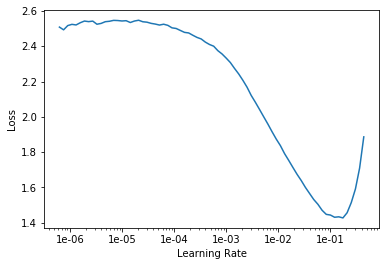

In [12]:
learn.recorder.plot()

In [16]:
callbacks = [ReduceLROnPlateauCallback(learn), EarlyStoppingCallback(learn)]
# learn.fit_one_cycle(1, max_lr=4.2*1e-3)
learn.fit_one_cycle(1, callbacks=callbacks, )

epoch,train_loss,valid_loss,error_rate,time
0,0.111446,0.215483,0.066500,04:36


In [17]:
learn.save('silicon-frozen-1.0')

### Hand evaluation

True
[('26%', '30%', 105), ('19%', '22%', 65), ('35%', '38%', 40), ('30%', '26%', 15), ('35%', '33%', 11), ('33%', '38%', 10), ('26%', '35%', 6), ('19%', '30%', 2), ('19%', '41%', 2), ('35%', '26%', 2), ('41%', '38%', 2)]


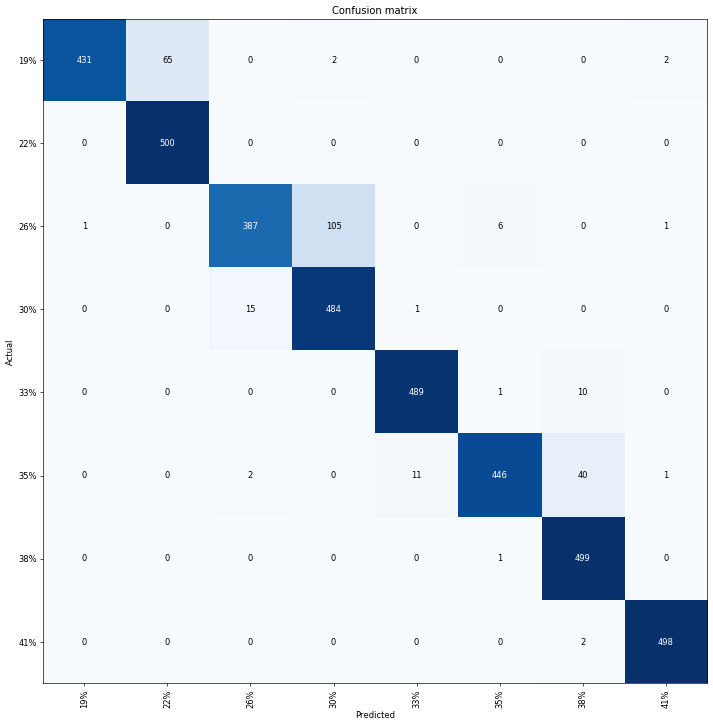

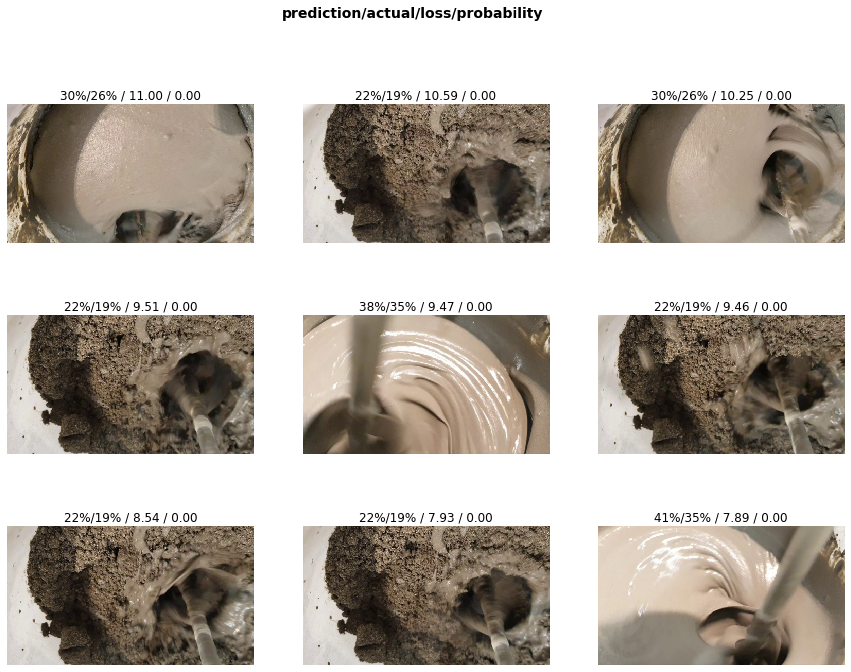

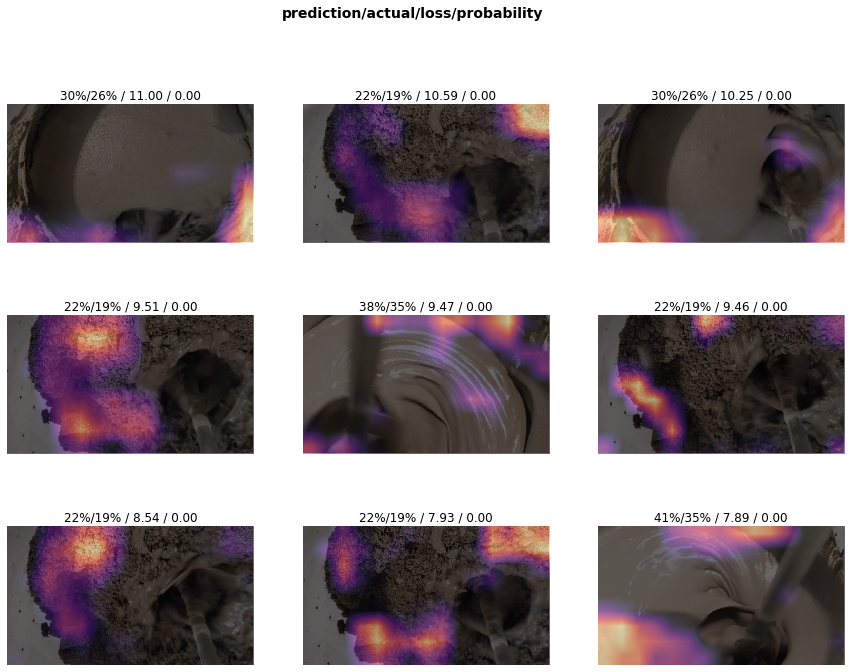

In [18]:
from IPython import display

def evaluate_model(model):
    interp = ClassificationInterpretation.from_learner(model)

    losses,idxs = interp.top_losses()

    print(len(data.valid_ds)==len(losses)==len(idxs))
    
#     display(interp.plot_confusion_matrix(figsize=(12,12), dpi=60, return_fig=True))
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60, return_fig=True)
    
    print(interp.most_confused(min_val=2))
    
    interp.plot_top_losses(9, figsize=(15,11), heatmap=False)
    interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

evaluate_model(learn)

## Unfreeze, train a bit more

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
evaluate_model(learn)

In [ ]:
learn.save('stage-unfreezed')
learn.export('beta-1-0_05')

# Prediction

In [ ]:
model = learn.load('real-frozen-1.1')

model.predict(Image.load())